In [5]:
X = [[1,1],[2,1],[2,2],[3,2]]

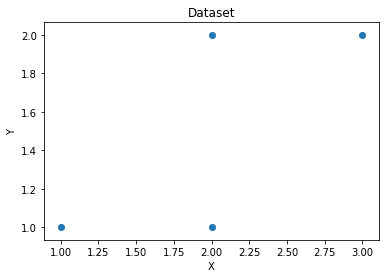

In [6]:
X

import numpy as np
X=np.array(X)

import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1])
plt.title('Dataset')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [7]:
import copy
X_m = np.mean(X[:,0])
Y_m = np.mean(X[:,1])

msubX = X[:,0] - X_m

msubY = X[:,1] - Y_m


In [8]:
msubData = np.column_stack((msubX,msubY))

msubData

array([[-1. , -0.5],
       [ 0. , -0.5],
       [ 0. ,  0.5],
       [ 1. ,  0.5]])

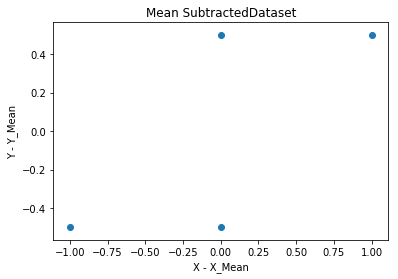

In [9]:
plt.scatter(msubData[:,0], msubData[:,1])
plt.title('Mean SubtractedDataset')
plt.xlabel('X - X_Mean')
plt.ylabel('Y - Y_Mean')
plt.show()

In [10]:
Var_X = 0

for ele in msubData[:,0]:
    Var_X = Var_X + ele*ele
    
Var_X = Var_X/3

Var_X

0.6666666666666666

In [11]:
Var_Y = 0 

for ele in msubData[:,1]:
    Var_Y = Var_Y + ele*ele

Var_Y = Var_Y/3

Var_Y

0.3333333333333333

In [12]:
Var_XY = 0
for ele,ele1 in msubData[:]:
    
    Var_XY = Var_XY + ele*ele1
    
Var_XY = Var_XY/3

Var_XY

0.3333333333333333

In [13]:
Cmat = np.column_stack(([Var_X,Var_XY],[Var_XY,Var_Y]))

Cmat

array([[0.66666667, 0.33333333],
       [0.33333333, 0.33333333]])

In [14]:
Cmatprod = np.dot(msubData,msubData.T)

Cmatprod

array([[ 1.25,  0.25, -0.25, -1.25],
       [ 0.25,  0.25, -0.25, -0.25],
       [-0.25, -0.25,  0.25,  0.25],
       [-1.25, -0.25,  0.25,  1.25]])

In [15]:
eigenval, eigenvec = np.linalg.eig(Cmatprod)

print(eigenval)

print(eigenvec)

[ 2.61803399e+00  3.81966011e-01 -1.28774772e-17 -1.12038849e-16]
[[-0.68819096  0.16245985  0.19438021 -0.57784916]
 [-0.16245985 -0.68819096  0.67986494  0.40754183]
 [ 0.16245985  0.68819096  0.67986494  0.40754183]
 [ 0.68819096 -0.16245985  0.19438021 -0.57784916]]


In [16]:
evec=eigenvec[:,[0]]
print(evec)

[[-0.68819096]
 [-0.16245985]
 [ 0.16245985]
 [ 0.68819096]]


In [17]:
e_val=eigenval[0]
print(e_val)

2.6180339887498945


In [18]:
import math
mdsproj=math.sqrt(e_val)*evec
print(mdsproj)

[[-1.11351636]
 [-0.26286556]
 [ 0.26286556]
 [ 1.11351636]]


In [19]:
from sklearn.metrics.pairwise import euclidean_distances
euc_dis_original=euclidean_distances(msubData, msubData)
print(euc_dis_original)

[[0.         1.         1.41421356 2.23606798]
 [1.         0.         1.         1.41421356]
 [1.41421356 1.         0.         1.        ]
 [2.23606798 1.41421356 1.         0.        ]]


In [20]:
euc_dis_mod=euclidean_distances(mdsproj, mdsproj)
print(euc_dis_mod)

[[0.         0.85065081 1.37638192 2.22703273]
 [0.85065081 0.         0.52573111 1.37638192]
 [1.37638192 0.52573111 0.         0.85065081]
 [2.22703273 1.37638192 0.85065081 0.        ]]


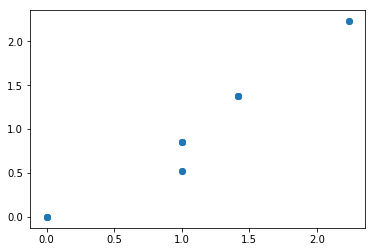

In [21]:
plt.scatter(euc_dis_original, euc_dis_mod)
plt.show()

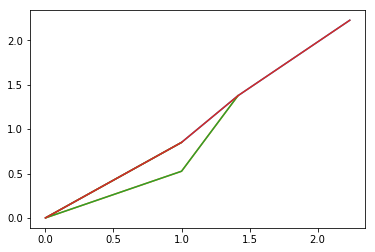

In [22]:
plt.plot(euc_dis_original, euc_dis_mod)
plt.show()

In [23]:
print(euc_dis_original-euc_dis_mod)

[[0.         0.14934919 0.03783164 0.00903525]
 [0.14934919 0.         0.47426889 0.03783164]
 [0.03783164 0.47426889 0.         0.14934919]
 [0.00903525 0.03783164 0.14934919 0.        ]]
